# Day 17

Source: http://www.donantesmalaga.org/donar/grupos-sanguineos

In [160]:
!pip install networkx matplotlib

In [161]:
import networkx as nx

In [162]:
G = nx.DiGraph()
G

In [163]:
blood_types = ["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-"]
G.add_nodes_from(blood_types)

In [164]:
donations = {
    "A+": ["A+", "AB+"],
    "A-": ["A+", "A-", "AB+", "AB-"],
    "B+": ["B+", "AB+"],
    "B-": ["B+", "B-", "AB+", "AB-"],
    "AB+": ["AB+"],
    "AB-": ["AB+", "AB-"],
    "O+": ["A+", "B+", "AB+", "O+"],
    "O-": ["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-"]
}

donations


{'A+': ['A+', 'AB+'],
 'A-': ['A+', 'A-', 'AB+', 'AB-'],
 'B+': ['B+', 'AB+'],
 'B-': ['B+', 'B-', 'AB+', 'AB-'],
 'AB+': ['AB+'],
 'AB-': ['AB+', 'AB-'],
 'O+': ['A+', 'B+', 'AB+', 'O+'],
 'O-': ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']}

In [165]:
for donor, recipients in donations.items():
    for recipient in recipients:
        G.add_edge(donor, recipient)

In [166]:
in_degrees = dict(G.in_degree())
node_sizes = [in_degrees[node] * 400 + 600 for node in G]

In [167]:
sorted_nodes = sorted(G.nodes(), key=lambda x: in_degrees[x], reverse=True)

In [168]:
import numpy as np

pos = {}
step_height = 1.4 / len(sorted_nodes)  # Ajustar la altura entre escalones
for i, node in enumerate(sorted_nodes):
    angle = np.pi/2 - i * 2 * np.pi / len(sorted_nodes)
    pos[node] = np.array([np.cos(angle), np.sin(angle) + i * step_height])

In [169]:
pos

{'AB+': array([6.123234e-17, 1.000000e+00]),
 'A+': array([0.70710678, 0.88210678]),
 'B+': array([1.  , 0.35]),
 'AB-': array([ 0.70710678, -0.18210678]),
 'A-': array([ 6.123234e-17, -3.000000e-01]),
 'B-': array([-0.70710678,  0.16789322]),
 'O+': array([-1.  ,  1.05]),
 'O-': array([-0.70710678,  1.93210678])}

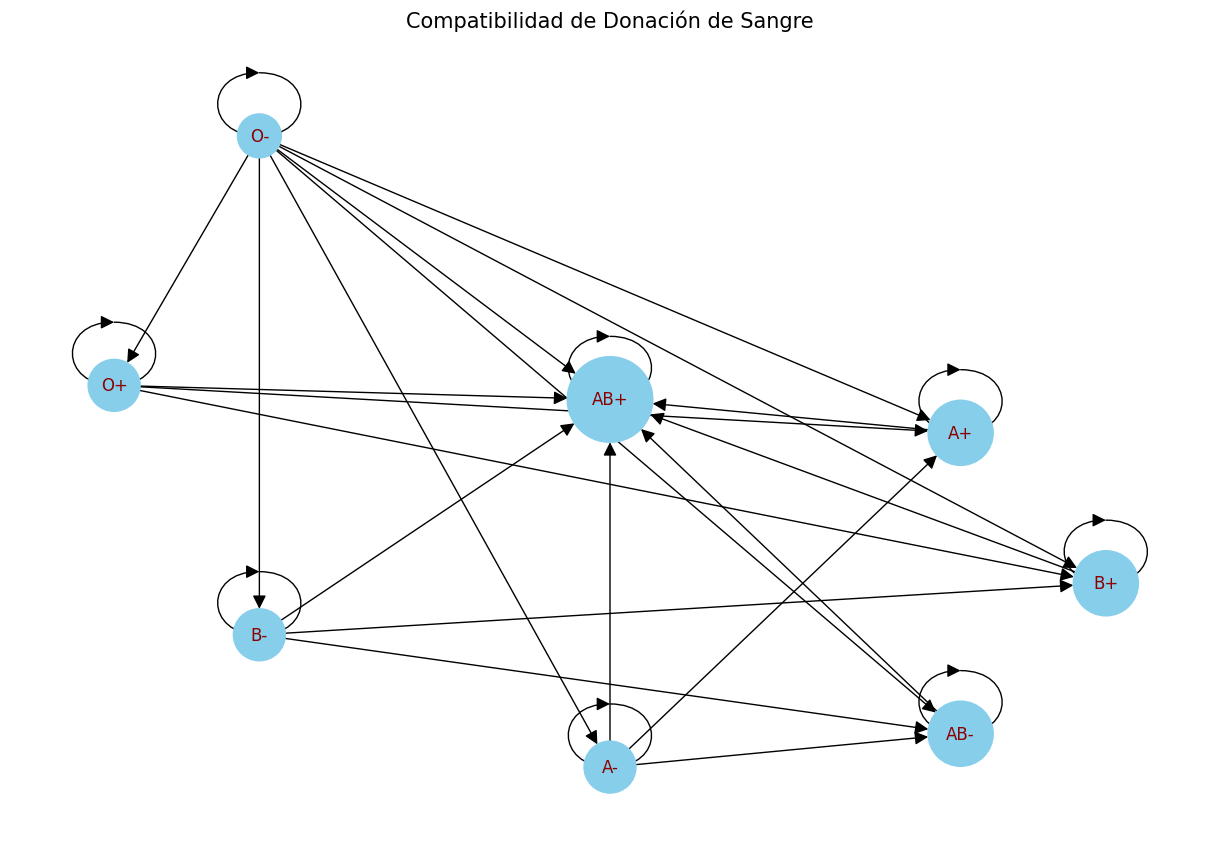

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=node_sizes, arrowstyle='-|>', arrowsize=20, font_size=12, font_color='darkred')
plt.title("Compatibilidad de Donación de Sangre", size=15)
plt.show()

In [171]:
donations_count = {node: len(set(recipients)) for node, recipients in donations.items()}
receives_count = {node: 0 for node in G.nodes()}
for donor, recipients in donations.items():
    for recipient in recipients:
        receives_count[recipient] += 1

In [172]:
f"{donations_count=}"

"donations_count={'A+': 2, 'A-': 4, 'B+': 2, 'B-': 4, 'AB+': 1, 'AB-': 2, 'O+': 4, 'O-': 8}"

In [173]:
f"{receives_count=}"

"receives_count={'A+': 4, 'A-': 2, 'B+': 4, 'B-': 2, 'AB+': 8, 'AB-': 4, 'O+': 2, 'O-': 1}"

In [174]:
labels = {node: f"{node}\n{donations_count[node]}, {receives_count[node]}" for node in G.nodes()}
labels

{'A+': 'A+\n2, 4',
 'A-': 'A-\n4, 2',
 'B+': 'B+\n2, 4',
 'B-': 'B-\n4, 2',
 'AB+': 'AB+\n1, 8',
 'AB-': 'AB-\n2, 4',
 'O+': 'O+\n4, 2',
 'O-': 'O-\n8, 1'}

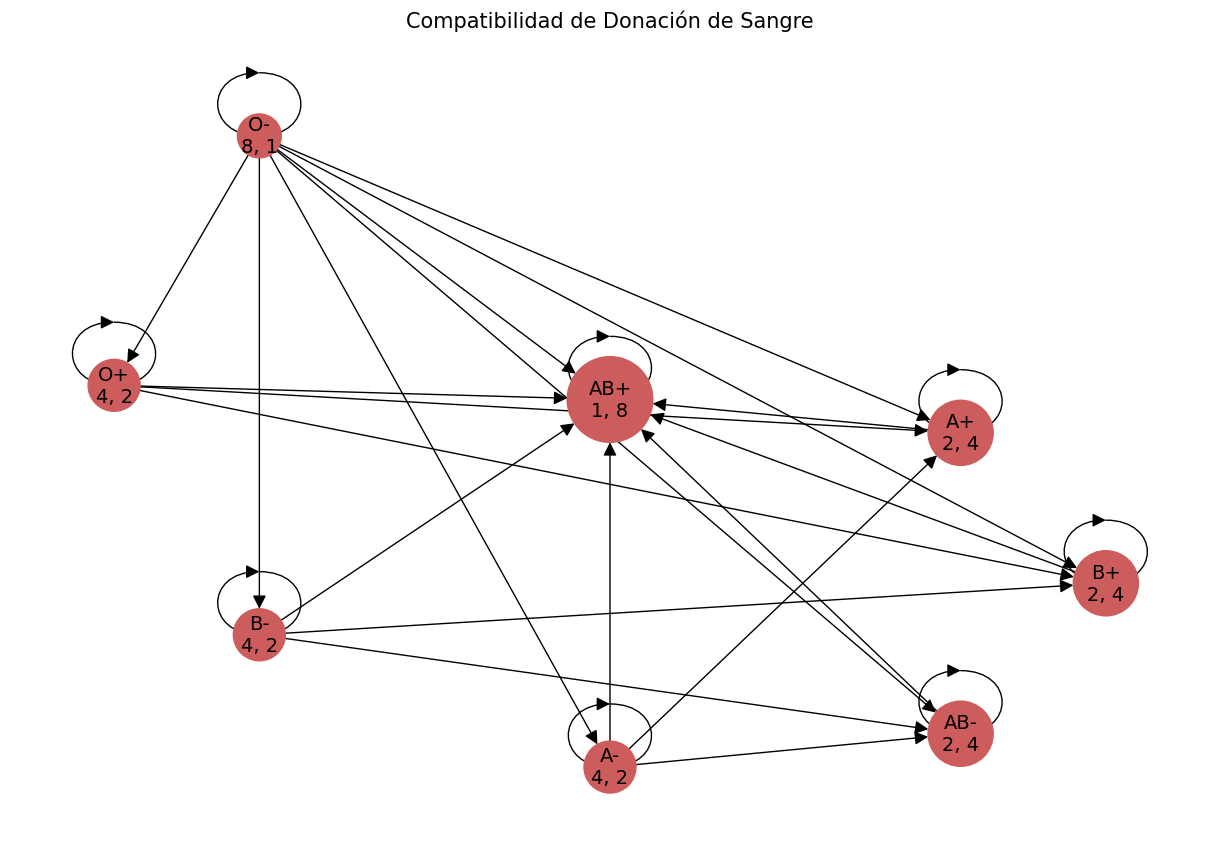

In [176]:
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color='#CD5C5C', node_size=node_sizes, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=14, font_color='black', verticalalignment='center')
plt.title("Compatibilidad de Donación de Sangre", size=15)
plt.show()

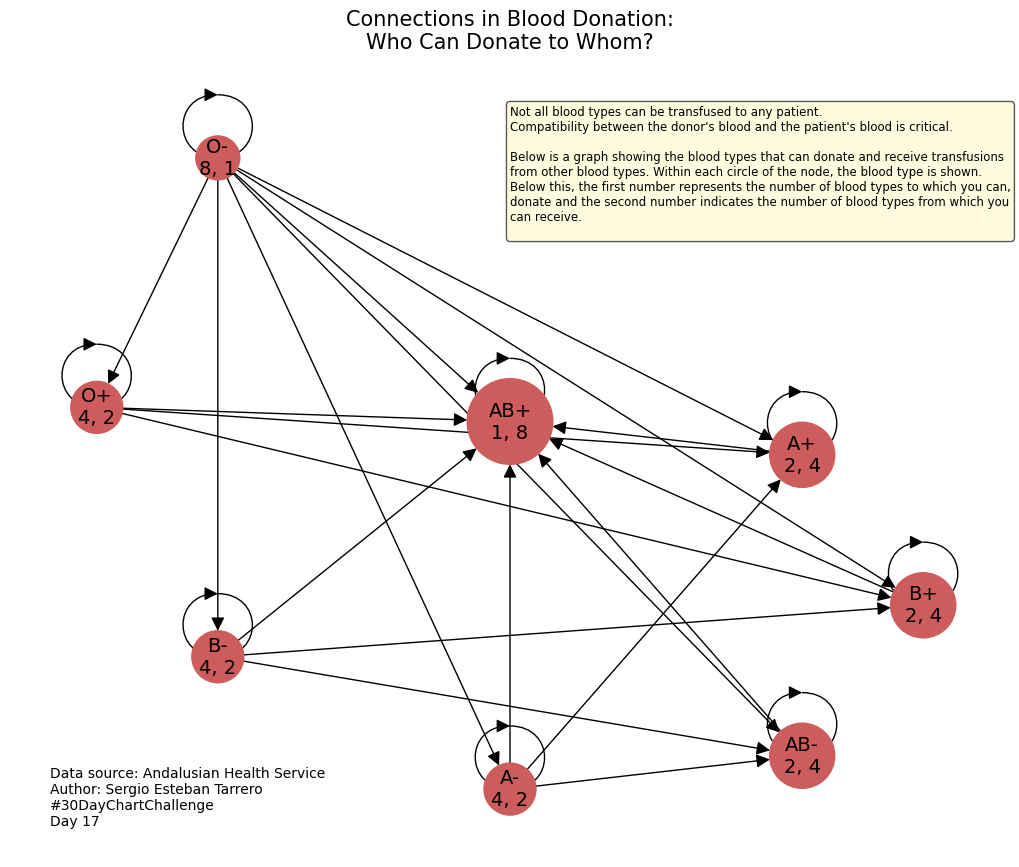

In [231]:
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_color='#CD5C5C', node_size=node_sizes, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=14, font_color='black', verticalalignment='center', horizontalalignment='center')
plt.title("Connections in Blood Donation:\nWho Can Donate to Whom?", size=15) 

plt.figtext(0.5, 0.94, "Not all blood types can be transfused to any patient.\n"
                       "Compatibility between the donor's blood and the patient's blood is critical.\n\n"
                       "Below is a graph showing the blood types that can donate and receive transfusions\n" 
                       "from other blood types. Within each circle of the node, the blood type is shown.\n" 
                       "Below this, the first number represents the number of blood types to which you can,\n"
                       "donate and the second number indicates the number of blood types from which you can receive.\n",
                    ha='left', va='top', fontsize=8.5, wrap=True, bbox=dict(boxstyle='round', facecolor='#FFFACD', alpha=0.65))

# añadir una leyenda de fuente de datos y autor
plt.figtext(0.04, 0.1, "Data source: Andalusian Health Service")
plt.figtext(0.04, 0.08, "Author: Sergio Esteban Tarrero")
plt.figtext(0.04, 0.06, "#30DayChartChallenge")
plt.figtext(0.04, 0.04, "Day 17")

# export to png file with 300 dpi
plt.savefig("SergioEstebanTarreroDay17.png", dpi=300, )
            
plt.axis('off')
plt.show()